In [1]:
import os
import numpy as np
import xarray as xr
import geopandas as gpd

import cartopy.crs as ccrs

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec

import warnings
warnings.filterwarnings('ignore')

In [2]:
veneto_dir = os.path.join('/','media','arturo','Arturo','Data','shapes','Europa','Italy')

if os.path.exists(veneto_dir):
    REGIONS = gpd.read_file(os.path.join(veneto_dir,'Italy_regions.geojson'))
else:
    raise SystemExit(f"File not found: {veneto_dir}")

In [3]:
data_in = os.path.join('..','output','Italy-SHP_DOWN_CMORPH_3h_2000_2010_npix_2_thr_1_acf_mar_genetic_pearson.nc')
DATA = xr.open_dataset(data_in)

lon2d, lat2d = np.meshgrid(DATA.lon, DATA.lat)
Mev_s = DATA.Mev_s.values
Mev_d = DATA.Mev_d.values

DATA

<xarray.Dataset> Size: 2MB
Dimensions:  (year: 11, lat: 48, lon: 52, Tr: 6)
Coordinates:
  * year     (year) int64 88B 2000 2001 2002 2003 2004 ... 2007 2008 2009 2010
  * Tr       (Tr) int64 48B 5 10 20 50 100 200
  * lat      (lat) float32 192B 36.12 36.38 36.62 36.88 ... 47.38 47.62 47.88
  * lon      (lon) float32 208B 6.125 6.375 6.625 6.875 ... 18.38 18.62 18.88
Data variables:
    NYs      (year, lat, lon) float64 220kB ...
    CYs      (year, lat, lon) float64 220kB ...
    WYs      (year, lat, lon) float64 220kB ...
    Mev_s    (Tr, lat, lon) float64 120kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NYd      (year, lat, lon) float64 220kB ...
    CYd      (year, lat, lon) float64 220kB ...
    WYd      (year, lat, lon) float64 220kB ...
    Mev_d    (Tr, lat, lon) float64 120kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    BETA     (lat, lon) float64 20kB ...
    GAMMA    (lat, lon) float64 20kB ...
    FUNVAL   (lat, lon) float64 20kB ...
Attributes:
    description:  Downscaling for 'CMORPH' in the Italy area, using 'mar' as ...

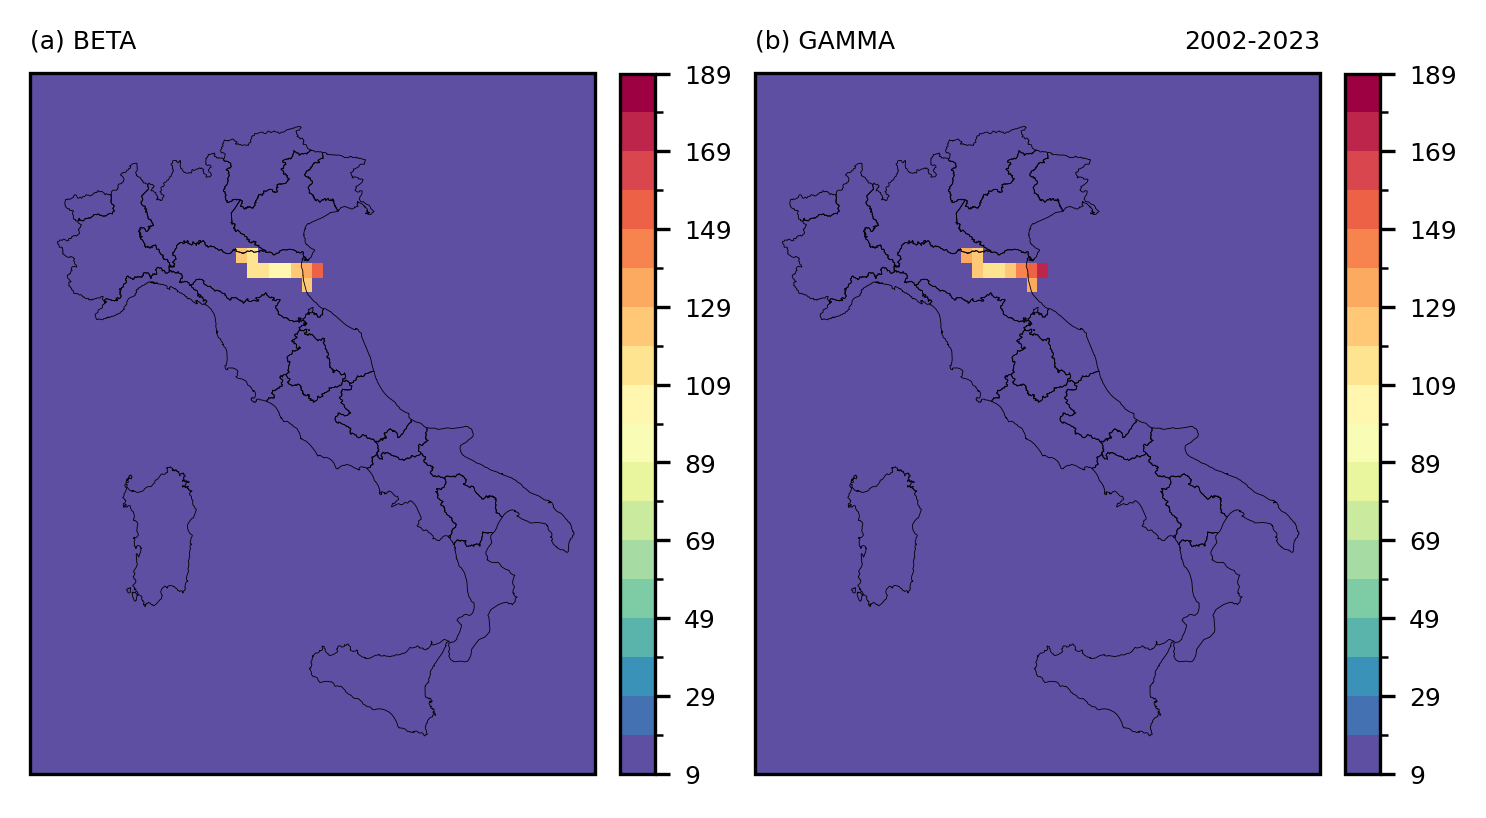

In [4]:
nmax = np.max([np.max(Mev_s[3,:,:]), np.max(Mev_d[3,:,:])])
levels_obs = np.arange(9,nmax+20,10)
norm = mcolors.BoundaryNorm(boundaries=levels_obs, ncolors=256)
# norm = None

cmap = plt.cm.Spectral_r
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(5,3),dpi=300)
gs = gridspec.GridSpec(1,2)

# ===========================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, Mev_s[3,:,:], cmap=cmap, norm=norm)
ax1.set_title('(a) BETA', loc='left', fontsize=6)
cbar = plt.colorbar(a1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ===========================================================================
ax1 = plt.subplot(gs[0, 1], projection = proj)
REGIONS.plot(facecolor='None', ax=ax1, zorder=10, linewidth=0.2)
a1 = ax1.pcolormesh(lon2d, lat2d, Mev_d[3,:,:], cmap=cmap, norm=norm)
ax1.set_title('(b) GAMMA', loc='left', fontsize=6)
ax1.set_title('2002-2023', loc='right', fontsize=6)
cbar = plt.colorbar(a1, fraction=0.056, pad=0.04)
cbar.ax.tick_params(labelsize=6)

# ===========================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.16, hspace=0.1)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)